In [2]:
import pandas as pd
import pyterrier as pt
# read csvs without header, column names are qid, sep, uuid, score
import pyterrier as pt
if not pt.started():
    pt.init()
qrels = pt.io.read_qrels("../data/assessments/qrels.txt") # type: ignore
qcred = pt.io.read_qrels("../data/assessments/qcredibility.txt") # type: ignore
qread = pt.io.read_qrels("../data/assessments/qreadability.txt") # type: ignore


PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


In [3]:
# print unique values of qcred column label
print(qcred.label.unique())

[2 1 0 3]


In [4]:
qrels.head()

,qid,docno,label
0,1,a6195d99-f7d7-43ec-907c-435cb7a62ee7,2
1,1,80fd9af1-c9b6-4d82-b62a-fe16d5b9d76f,1
2,1,4a8c5d85-b2d0-43bc-83f4-c1acfe0b3481,2
3,1,22990a4b-6a9f-4e00-9e72-aef0fbee202b,0
4,1,fd6ddab2-e4d9-4151-9972-256f5be6eb21,1


In [5]:
all_passages = pd.read_csv("Webdoc/txt.tsv", sep="\t")

In [6]:
# merge qrels, qcred, qread to one dataframe with columns qid, uuid, qrel, qcred, qread
qmerge = qrels.merge(qcred, on=["qid", "docno"], how="left")
qmerge = qmerge.merge(qread, on=["qid", "docno"], how="left")
qmerge = qmerge.rename(columns={"docno": "uuid", "label_x": "qrel", "label_y": "qcred", "label": "qread"})

In [7]:
# filter qmerge for uuids which are in all_passages
qmerge = qmerge[qmerge.uuid.isin(all_passages.docid)]

In [8]:
# new df with cols qid, qrel_0, qrel_1, qrel_2, qcred_0, qcred_1, qcred_2, qread_0, qread_1, qread_2
# uuid is dropped, qrel_0 contains the number of uuids with qrel=0 for each qid
qagg = qmerge.groupby(["qid"]).agg({"qrel": [lambda x: (x==0).sum(), lambda x: (x==1).sum(), lambda x: (x==2).sum()],
                                        "qcred": [lambda x: (x==0).sum(), lambda x: (x==1).sum(), lambda x: (x==2).sum(), lambda x: (x==3).sum()],
                                        "qread": [lambda x: (x==0).sum(), lambda x: (x==1).sum(), lambda x: (x==2).sum()],
                                        "uuid": "count"})
qagg.columns = ["qrel_0", "qrel_1", "qrel_2", "qcred_0", "qcred_1", "qcred_2", "qcred_3", "qread_0", "qread_1", "qread_2", "uuid_count"]
qagg = qagg.reset_index()
# order dataframe by qid, qid as integer
qagg = qagg.sort_values(by=["qid"], key=lambda x: x.astype(int))
qagg

,qid,qrel_0,qrel_1,qrel_2,qcred_0,qcred_1,qcred_2,qcred_3,qread_0,qread_1,qread_2,uuid_count
0,1,71,86,87,59,83,102,0,8,85,151,244
38,8,191,22,22,18,178,39,0,2,69,164,235
21,22,86,93,70,38,56,147,8,30,128,91,249
22,35,133,10,11,23,122,2,7,13,46,95,154
23,45,36,36,53,44,31,39,11,64,47,14,125
24,51,53,83,50,39,109,26,12,48,113,25,186
25,52,95,51,43,3,44,133,9,35,101,53,189
26,53,149,17,13,1,114,49,15,30,137,12,179
27,54,151,53,41,1,42,193,9,7,74,164,245
28,55,130,73,42,0,86,154,5,3,18,224,245


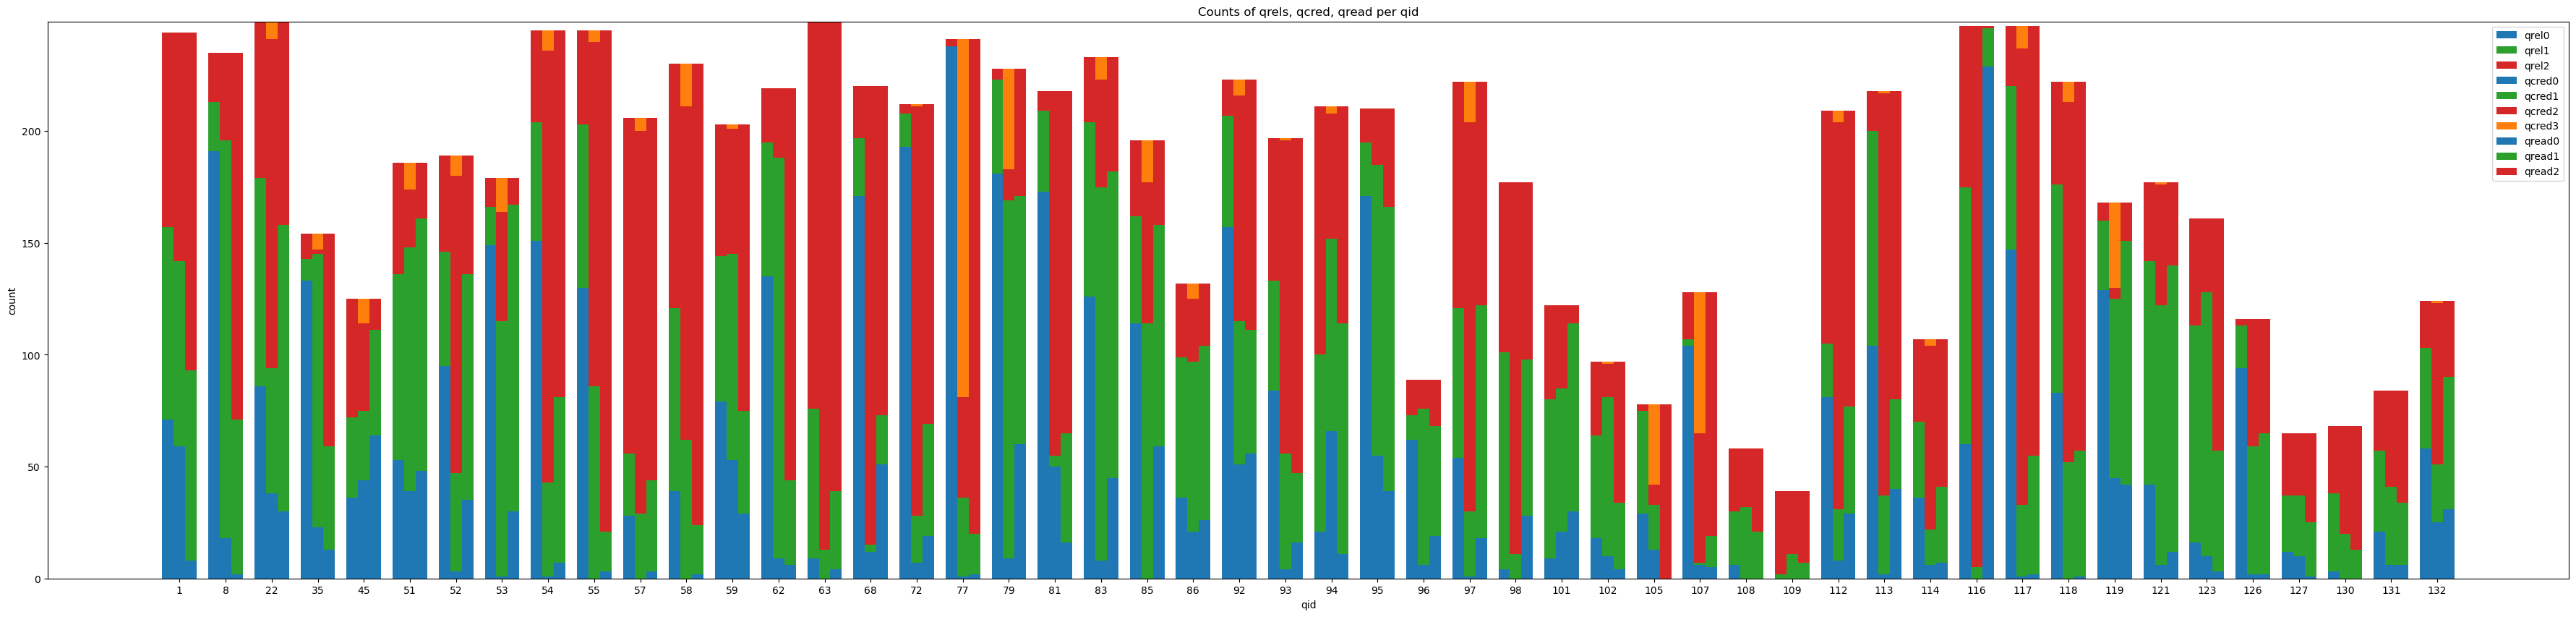

In [49]:
# visualize the table as a bar chart. qrels, qcred, qread are plotted in separate bars, to in total 3 bars per qid.
# The different values (qrel_0, qrel_1, qrel2) of qrels, qcred, qread are stacked on top of each other.
import numpy as np
import matplotlib.pyplot as plt

# increase figure size
plt.rcParams['figure.figsize'] = [45, 10]

fig, ax = plt.subplots()
# set width of bar
width = 0.25

# 4 colors blue green red yellow
colors = ["#1f77b4", "#2ca02c", "#d62728", "#ff7f0e"]

bottom = np.zeros(50)

weight_counts_qrels = {
    "qrel0": qagg.qrel_0,
    "qrel1": qagg.qrel_1,
    "qrel2": qagg.qrel_2
}

weight_counts_qcred = {
    "qcred0": qagg.qcred_0,
    "qcred1": qagg.qcred_1,
    "qcred2": qagg.qcred_2,
    "qcred3": qagg.qcred_3
}
weight_counts_qread = {
    "qread0": qagg.qread_0,
    "qread1": qagg.qread_1,
    "qread2": qagg.qread_2
}

all_weight_counts = [weight_counts_qrels, weight_counts_qcred, weight_counts_qread]

x = np.arange(50)
for idx, all_weight in enumerate(all_weight_counts):
    bottom = np.zeros(50)
    color_index = 0
    for boolean, weight_count in all_weight.items():
        p = ax.bar(x + idx*0.25, weight_count, width, label=boolean, bottom=bottom, color=colors[color_index])
        bottom += weight_count
        color_index += 1

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.xlabel('qid')
plt.ylabel('count')
plt.title('Counts of qrels, qcred, qread per qid')
plt.xticks(x + width, qagg.qid)
# Create legend & Show graphic
plt.legend()
plt.show()
